<a href="https://colab.research.google.com/github/Hemapriya-aids/machine-learining-internship/blob/main/Task_1_machine_learning_intership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Decision Tree Classification on the Iris Dataset
# --------------------------------------------------------------
# Goal:
#   • Train a Decision Tree classifier
#   • Visualize the trained model
#   • Analyse its performance with metrics & feature importance

# ------------------------------
# Import Required Libraries
# ------------------------------
import numpy as np                    # numerical computations
import pandas as pd                   # data handling and analysis
import matplotlib.pyplot as plt        # plotting graphs
import seaborn as sns                 # additional visualization tools

from sklearn.model_selection import train_test_split   # to split data
from sklearn.tree import DecisionTreeClassifier, plot_tree  # decision tree model & visualizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Load Dataset
# Using seaborn's built-in iris dataset (150 rows × 5 columns)
iris = sns.load_dataset("iris")
print("Preview of data:")
display(iris.head())        # shows first 5 rows
print("\nDataset info:")
display(iris.info())          # datatypes + null check


Preview of data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [ ]:
#Split Features & Target
X = iris.drop("species", axis=1)   # features: numeric measurements
y = iris["species"]                # target: flower species

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:

#Build & Train Model

# max_depth keeps tree readable and avoids overfitting
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
#predictions

y_pred = model.predict(X_test)

Model Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



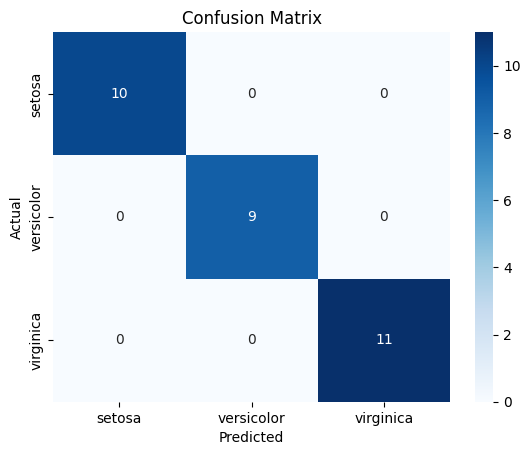

In [ ]:

#Evaluation / Analysis

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")

# Precision, Recall, F1
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Feature Importance:

petal_length    0.934626
petal_width     0.065374
sepal_width     0.000000
sepal_length    0.000000
dtype: float64


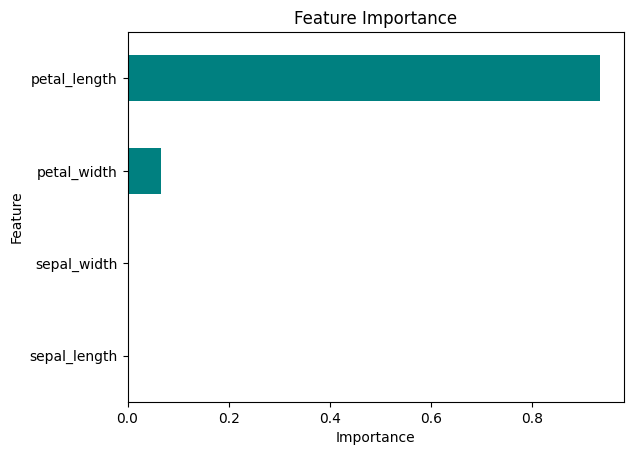

In [ ]:

#Feature Importance
# Which features influence decisions most
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importance:\n")
print(feat_imp.sort_values(ascending=False))

# Bar plot of importance
feat_imp.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


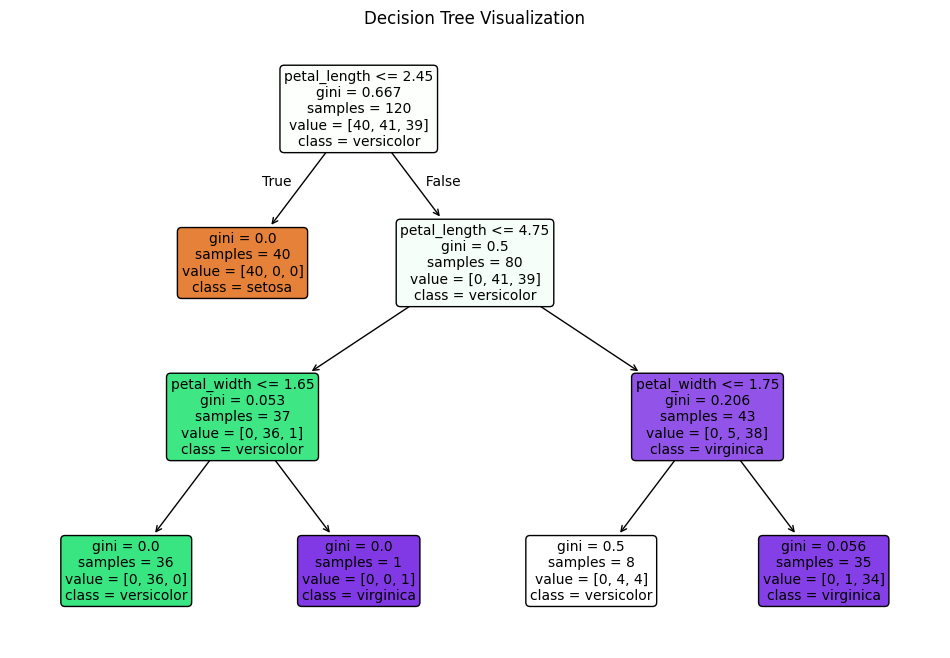

In [ ]:

#Model Visualization
plt.figure(figsize=(12,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()
